## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
#  YOUR CODE GOES HERE
import pandas as pd

# Load the dataset from the provided URL
url = 'https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv'
df = pd.read_csv(url)

# Display the first few rows to verify the dataset is loaded correctly
df.head()

# Drop the non-beneficial ID columns: 'EIN' and 'NAME'
df = df.drop(columns=['EIN', 'NAME'])

# Handle the categorical columns using pd.get_dummies() for one-hot encoding
df = pd.get_dummies(df, columns=['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE',
                                 'ORGANIZATION', 'STATUS', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS'])

# Split the data into features (X) and target (y)
X = df.drop(columns=['IS_SUCCESSFUL'])
y = df['IS_SUCCESSFUL']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Your data is now preprocessed and ready for building the neural network!


In [3]:
# Determine the number of unique values in each column.
#  YOUR CODE GOES HERE
# Determine the number of unique values in each column
unique_values = df.nunique()

# Display the result
print(unique_values)


ASK_AMT                     8747
IS_SUCCESSFUL                  2
APPLICATION_TYPE_T10           2
APPLICATION_TYPE_T12           2
APPLICATION_TYPE_T13           2
                            ... 
INCOME_AMT_25000-99999         2
INCOME_AMT_50M+                2
INCOME_AMT_5M-10M              2
SPECIAL_CONSIDERATIONS_N       2
SPECIAL_CONSIDERATIONS_Y       2
Length: 118, dtype: int64


In [7]:
# Look at APPLICATION_TYPE value counts to identify and replace with "Other"
#  YOUR CODE GOES HERE

import pandas as pd

# Reload the original dataset to access 'APPLICATION_TYPE'
url = 'https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv'
df = pd.read_csv(url)

# Step 1: Look at the value counts for APPLICATION_TYPE
application_type_counts = df['APPLICATION_TYPE'].value_counts()

# Step 2: Define a threshold - values appearing less than 500 times will be replaced with 'Other'
threshold = 500
application_types_to_replace = application_type_counts[application_type_counts < threshold].index

# Step 3: Replace infrequent application types with 'Other'
df['APPLICATION_TYPE'] = df['APPLICATION_TYPE'].replace(application_types_to_replace, 'Other')

# Step 4: Now apply one-hot encoding after replacing infrequent values
df = pd.get_dummies(df, columns=['APPLICATION_TYPE'])

# Verify the updated DataFrame
df.head()



,EIN,NAME,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,Independent,C1000,ProductDev,Association,1,0,N,5000,1,False,True,False,False,False,False,False,False,False
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1,False,False,False,True,False,False,False,False,False
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0,False,False,False,False,False,True,False,False,False
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1,False,False,False,True,False,False,False,False,False
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1,False,False,False,True,False,False,False,False,False


In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Step 1: Initialize the model
model = Sequential()

# Step 2: Add input and hidden layers
# Input layer with the number of features from the training data (e.g., X_train.shape[1])
model.add(Dense(units=80, activation='relu', input_dim=X_train_scaled.shape[1]))

# Add additional hidden layers if necessary
model.add(Dense(units=30, activation='relu'))

# Step 3: Output layer (binary classification, use sigmoid activation)
model.add(Dense(units=1, activation='sigmoid'))

# Step 4: Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 5: Summarize the model to check the structure
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 80)                  │           9,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 30)                  │           2,430 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,901 (46.49 KB)

 Trainable params: 11,901 (46.49 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
#  YOUR CODE GOES HERE

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure replacement was successful
application_df['APPLICATION_TYPE'].value_counts()

,count
APPLICATION_TYPE,
T3,27037
T4,1542
T6,1216
T5,1173
T19,1065
T8,737
T7,725
T10,528
Other,276


In [10]:
# Look at CLASSIFICATION value counts to identify and replace with "Other"
#  YOUR CODE GOES HERE
# Step 1: View the value counts for CLASSIFICATION
classification_counts = application_df['CLASSIFICATION'].value_counts()

# Step 2: Choose a cutoff value (e.g., less than 1000) and create a list of classifications to replace
cutoff = 1000  # You can adjust the cutoff value as needed
classifications_to_replace = classification_counts[classification_counts < cutoff].index

# Step 3: Replace these classifications with 'Other'
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls, 'Other')

# Step 4: Check to make sure the replacement was successful by viewing the updated value counts
print(application_df['CLASSIFICATION'].value_counts())


CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: count, dtype: int64


In [11]:
# You may find it helpful to look at CLASSIFICATION value counts >1
#  YOUR CODE GOES HERE
# Step 1: View the value counts for CLASSIFICATION
classification_counts = application_df['CLASSIFICATION'].value_counts()

# Step 2: Filter to keep only classifications that occur more than once
classification_counts_gt_1 = classification_counts[classification_counts > 1]

# Step 3: Display the filtered classification counts
print(classification_counts_gt_1)


CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: count, dtype: int64


In [ ]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
#  YOUR CODE GOES HERE

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure replacement was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [12]:
# Convert categorical data to numeric with `pd.get_dummies`
#  YOUR CODE GOES HERE
# Convert categorical data to numeric using pd.get_dummies
application_df = pd.get_dummies(application_df, columns=['APPLICATION_TYPE', 'CLASSIFICATION', 'AFFILIATION',
                                                         'USE_CASE', 'ORGANIZATION', 'STATUS',
                                                         'INCOME_AMT', 'SPECIAL_CONSIDERATIONS'])

# Display the first few rows of the updated DataFrame
application_df.head()


,EIN,NAME,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,5000,1,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,108590,1,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,True,False
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,5000,0,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,6692,1,False,False,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,142590,1,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False


In [13]:
# Split our preprocessed data into our features and target arrays
#  YOUR CODE GOES HERE

# Split the preprocessed data into a training and testing dataset
#  YOUR CODE GOES HERE
from sklearn.model_selection import train_test_split

# Step 1: Split our preprocessed data into features (X) and target (y) arrays
# Assuming 'IS_SUCCESSFUL' is the target column
X = application_df.drop(columns=['IS_SUCCESSFUL'])  # Features (everything except the target)
y = application_df['IS_SUCCESSFUL']  # Target (the column we want to predict)

# Step 2: Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the resulting datasets
print(f"Training Features Shape: {X_train.shape}")
print(f"Testing Features Shape: {X_test.shape}")
print(f"Training Target Shape: {y_train.shape}")
print(f"Testing Target Shape: {y_test.shape}")


Training Features Shape: (27439, 46)
Testing Features Shape: (6860, 46)
Training Target Shape: (27439,)
Testing Target Shape: (6860,)


In [17]:
# Step 1: Drop the 'NAME' column as it is not useful for the model
X_train = X_train.drop(columns=['NAME'])
X_test = X_test.drop(columns=['NAME'])

# Step 2: Now apply scaling using StandardScaler
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler on the training data and scale both the training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Compile, Train and Evaluate the Model

In [18]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model - deep neural net, with input features and hidden nodes for each layer
nn = tf.keras.models.Sequential()

# First hidden layer
# Input shape is determined by the number of features in your training data
nn.add(Dense(units=80, activation='relu', input_dim=X_train_scaled.shape[1]))

# Second hidden layer
nn.add(Dense(units=30, activation='relu'))

# Output layer - binary classification
nn.add(Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 80)                  │           3,680 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 30)                  │           2,430 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,141 (23.99 KB)

 Trainable params: 6,141 (23.99 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# Compile the model
#  YOUR CODE GOES HERE
# Compile the model
nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [20]:
# Train the model
#  YOUR CODE GOES HERE
# Train the model
history = nn.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2)


Epoch 1/100
686/686 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6927 - loss: 0.5989 - val_accuracy: 0.7416 - val_loss: 0.5511
Epoch 2/100
686/686 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7275 - loss: 0.5505 - val_accuracy: 0.7405 - val_loss: 0.5470
Epoch 3/100
686/686 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7318 - loss: 0.5491 - val_accuracy: 0.7383 - val_loss: 0.5441
Epoch 4/100
686/686 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7314 - loss: 0.5481 - val_accuracy: 0.7382 - val_loss: 0.5432
Epoch 5/100
686/686 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7261 - loss: 0.5484 - val_accuracy: 0.7429 - val_loss: 0.5427
Epoch 6/100
686/686 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7342 - loss: 0.5418 - val_accuracy: 0.7392 - val_loss: 0.5445
Epoch 7/100
686/686 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7352 - loss: 0.5434 - val_accuracy: 0.7400 - val_loss: 0.5442
Epoch 8/100
686/686 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7343 - loss: 0.5451 - val_accu

In [21]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

215/215 - 0s - 2ms/step - accuracy: 0.7252 - loss: 0.5832
Loss: 0.5831737518310547, Accuracy: 0.725218653678894


In [22]:
# Export our model to HDF5 file
#  YOUR CODE GOES HERE
# Export the model to an HDF5 file
nn.save('AlphabetSoupCharity.h5')


In [23]:
from sklearn.metrics import confusion_matrix, classification_report

# Make predictions using the test data
y_pred = (nn.predict(X_test_scaled) > 0.5).astype("int32")

# Generate confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[2023 1173]
 [ 712 2952]]
              precision    recall  f1-score   support

           0       0.74      0.63      0.68      3196
           1       0.72      0.81      0.76      3664

    accuracy                           0.73      6860
   macro avg       0.73      0.72      0.72      6860
weighted avg       0.73      0.73      0.72      6860



In [24]:
# Drop unnecessary columns (if any) after evaluation
# You might re-evaluate NAME or EIN if they were included
application_df = application_df.drop(columns=['EIN', 'NAME'])


In [25]:
# Define a new model with more neurons and additional hidden layers
nn = tf.keras.models.Sequential()

# First hidden layer with more neurons
nn.add(Dense(units=100, activation='relu', input_dim=X_train_scaled.shape[1]))

# Second hidden layer with more neurons
nn.add(Dense(units=50, activation='relu'))

# Adding a third hidden layer
nn.add(Dense(units=25, activation='relu'))

# Output layer
nn.add(Dense(units=1, activation='sigmoid'))

# Compile the model with the same settings
nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
# Second hidden layer using 'tanh' activation
nn.add(Dense(units=50, activation='tanh'))


In [28]:
from tensorflow.keras.layers import Dropout

# Adding dropout layers to the model
nn = tf.keras.models.Sequential()

# First hidden layer with dropout
nn.add(Dense(units=100, activation='relu', input_dim=X_train_scaled.shape[1]))
nn.add(Dropout(0.2))  # Dropout rate of 20%

# Second hidden layer with dropout
nn.add(Dense(units=50, activation='relu'))
nn.add(Dropout(0.2))

# Third hidden layer
nn.add(Dense(units=25, activation='relu'))

# Output layer
nn.add(Dense(units=1, activation='sigmoid'))

# Compile and train the model with more epochs
nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = nn.fit(X_train_scaled, y_train, epochs=200, batch_size=32, validation_split=0.2)


Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


686/686 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6652 - loss: 0.6229 - val_accuracy: 0.7403 - val_loss: 0.5528
Epoch 2/200
686/686 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7208 - loss: 0.5657 - val_accuracy: 0.7387 - val_loss: 0.5495
Epoch 3/200
686/686 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7272 - loss: 0.5623 - val_accuracy: 0.7385 - val_loss: 0.5468
Epoch 4/200
686/686 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7275 - loss: 0.5564 - val_accuracy: 0.7385 - val_loss: 0.5442
Epoch 5/200
686/686 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7280 - loss: 0.5531 - val_accuracy: 0.7416 - val_loss: 0.5435
Epoch 6/200
686/686 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7332 - loss: 0.5500 - val_accuracy: 0.7418 - val_loss: 0.5456
Epoch 7/200
686/686 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7305 - loss: 0.5454 - val_accuracy: 0.7414 - val_loss: 0.5392
Epoch 8/200
686/686 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7290 - loss: 0.5532 - val_accuracy: 0.7394

In [29]:
# Evaluate the model on the test data
test_loss, test_acc = nn.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {test_acc}")


215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7255 - loss: 0.5639
Test Accuracy: 0.7256559729576111


In [30]:
# Increase the number of neurons in each layer
nn = tf.keras.models.Sequential()

# First hidden layer with more neurons
nn.add(Dense(units=128, activation='relu', input_dim=X_train_scaled.shape[1]))

# Second hidden layer with more neurons
nn.add(Dense(units=64, activation='relu'))

# Third hidden layer
nn.add(Dense(units=32, activation='relu'))

# Output layer
nn.add(Dense(units=1, activation='sigmoid'))

# Compile the model
nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [31]:
# Train the model for more epochs
history = nn.fit(X_train_scaled, y_train, epochs=300, batch_size=32, validation_split=0.2)


Epoch 1/300
686/686 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6939 - loss: 0.5934 - val_accuracy: 0.7398 - val_loss: 0.5459
Epoch 2/300
686/686 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7302 - loss: 0.5533 - val_accuracy: 0.7422 - val_loss: 0.5444
Epoch 3/300
686/686 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7281 - loss: 0.5506 - val_accuracy: 0.7425 - val_loss: 0.5406
Epoch 4/300
686/686 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7223 - loss: 0.5543 - val_accuracy: 0.7365 - val_loss: 0.5449
Epoch 5/300
686/686 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7277 - loss: 0.5501 - val_accuracy: 0.7440 - val_loss: 0.5398
Epoch 6/300
686/686 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7284 - loss: 0.5483 - val_accuracy: 0.7405 - val_loss: 0.5404
Epoch 7/300
686/686 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7303 - loss: 0.5451 - val_accuracy: 0.7413 - val_loss: 0.5425
Epoch 8/300
686/686 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7324 - loss: 0.5469 - val_accu

In [32]:
# Evaluate the model on the test data
test_loss, test_acc = nn.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {test_acc}")


215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7227 - loss: 0.7129
Test Accuracy: 0.7193877696990967


In [33]:
# Compile the model with RMSprop optimizer
nn.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])


In [34]:
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Train the model with early stopping
history = nn.fit(X_train_scaled, y_train, epochs=300, batch_size=32, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/300
686/686 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7705 - loss: 0.4739 - val_accuracy: 0.7394 - val_loss: 0.7986
Epoch 2/300
686/686 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7744 - loss: 0.4680 - val_accuracy: 0.7374 - val_loss: 0.7938
Epoch 3/300
686/686 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7696 - loss: 0.4764 - val_accuracy: 0.7396 - val_loss: 0.8274
Epoch 4/300
686/686 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7669 - loss: 0.4814 - val_accuracy: 0.7376 - val_loss: 0.7625
Epoch 5/300
686/686 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7651 - loss: 0.4846 - val_accuracy: 0.7383 - val_loss: 0.7917
Epoch 6/300
686/686 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7657 - loss: 0.4863 - val_accuracy: 0.7403 - val_loss: 0.7722
Epoch 7/300
686/686 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7711 - loss: 0.4806 - val_accuracy: 0.7369 - val_loss: 0.7707
Epoch 8/300
686/686 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7715 - loss: 0.4887 - val_accu

In [35]:
# Evaluate the model on the test data
test_loss, test_acc = nn.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {test_acc}")

215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7284 - loss: 0.6058
Test Accuracy: 0.7263848185539246


In [36]:
# Evaluate the model on the test data
test_loss, test_acc = nn.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {test_acc}")


215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7284 - loss: 0.6058
Test Accuracy: 0.7263848185539246


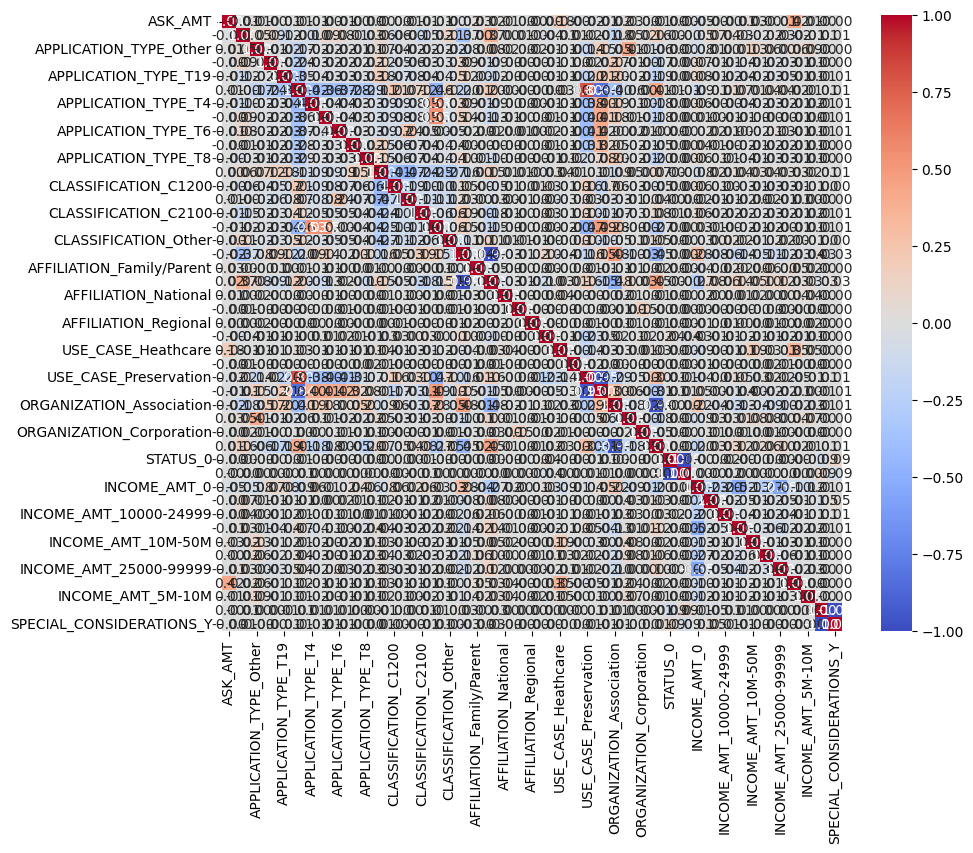

In [37]:
# Check correlations between features
import seaborn as sns
import matplotlib.pyplot as plt

# Create a correlation matrix
corr_matrix = application_df.corr()

# Plot heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


In [38]:
# Apply log transformation to features with a wide range of values (e.g., ASK_AMT)
import numpy as np
application_df['ASK_AMT'] = np.log1p(application_df['ASK_AMT'])


In [39]:
from tensorflow.keras import regularizers

# Adding L2 regularization to hidden layers
nn = tf.keras.models.Sequential()

# First hidden layer with L2 regularization
nn.add(Dense(units=128, activation='relu', input_dim=X_train_scaled.shape[1],
             kernel_regularizer=regularizers.l2(0.01)))

# Second hidden layer
nn.add(Dense(units=64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))

# Output layer
nn.add(Dense(units=1, activation='sigmoid'))

# Compile the model
nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = nn.fit(X_train_scaled, y_train, epochs=300, batch_size=32, validation_split=0.2)


Epoch 1/300


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


686/686 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7092 - loss: 1.2528 - val_accuracy: 0.7365 - val_loss: 0.6091
Epoch 2/300
686/686 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7246 - loss: 0.5991 - val_accuracy: 0.7389 - val_loss: 0.5746
Epoch 3/300
686/686 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7268 - loss: 0.5827 - val_accuracy: 0.7383 - val_loss: 0.5696
Epoch 4/300
686/686 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7234 - loss: 0.5828 - val_accuracy: 0.7402 - val_loss: 0.5677
Epoch 5/300
686/686 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7221 - loss: 0.5773 - val_accuracy: 0.7338 - val_loss: 0.5653
Epoch 6/300
686/686 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7216 - loss: 0.5762 - val_accuracy: 0.7354 - val_loss: 0.5700
Epoch 7/300
686/686 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7300 - loss: 0.5715 - val_accuracy: 0.7400 - val_loss: 0.5647
Epoch 8/300
686/686 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7283 - loss: 0.5714 - val_accuracy: 0.7391

In [40]:
from tensorflow.keras.layers import BatchNormalization

# Adding batch normalization to hidden layers
nn = tf.keras.models.Sequential()

# First hidden layer with batch normalization
nn.add(Dense(units=128, activation='relu', input_dim=X_train_scaled.shape[1]))
nn.add(BatchNormalization())

# Second hidden layer with batch normalization
nn.add(Dense(units=64, activation='relu'))
nn.add(BatchNormalization())

# Output layer
nn.add(Dense(units=1, activation='sigmoid'))

# Compile the model
nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = nn.fit(X_train_scaled, y_train, epochs=300, batch_size=32, validation_split=0.2)


Epoch 1/300
686/686 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7019 - loss: 0.6123 - val_accuracy: 0.7363 - val_loss: 0.5589
Epoch 2/300
686/686 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7280 - loss: 0.5600 - val_accuracy: 0.7318 - val_loss: 0.5521
Epoch 3/300
686/686 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7215 - loss: 0.5620 - val_accuracy: 0.7402 - val_loss: 0.5472
Epoch 4/300
686/686 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7237 - loss: 0.5574 - val_accuracy: 0.7367 - val_loss: 0.5480
Epoch 5/300
686/686 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7257 - loss: 0.5545 - val_accuracy: 0.7396 - val_loss: 0.5466
Epoch 6/300
686/686 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7263 - loss: 0.5539 - val_accuracy: 0.7372 - val_loss: 0.5419
Epoch 7/300
686/686 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7334 - loss: 0.5544 - val_accuracy: 0.7405 - val_loss: 0.5478
Epoch 8/300
686/686 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7293 - loss: 0.5506 - val_accu

In [41]:
pip install keras-tuner


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.5 MB/s eta 0:00:00


In [42]:
import keras_tuner as kt

def build_model(hp):
    model = tf.keras.models.Sequential()
    # Tune number of neurons in the first hidden layer
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=256, step=32), activation='relu', input_dim=X_train_scaled.shape[1]))
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=256, step=32), activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Instantiate tuner
tuner = kt.RandomSearch(build_model, objective='val_accuracy', max_trials=5)

# Perform hyperparameter search
tuner.search(X_train_scaled, y_train, epochs=100, validation_split=0.2)


Trial 4 Complete [00h 04m 52s]
val_accuracy: 0.7501822113990784

Best val_accuracy So Far: 0.7507288455963135
Total elapsed time: 00h 16m 25s

Search: Running Trial #5

Value             |Best Value So Far |Hyperparameter
32                |224               |units

Epoch 1/100
686/686 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6777 - loss: 0.6144 - val_accuracy: 0.7383 - val_loss: 0.5515
Epoch 2/100
686/686 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7309 - loss: 0.5521 - val_accuracy: 0.7354 - val_loss: 0.5473
Epoch 3/100
686/686 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7282 - loss: 0.5523 - val_accuracy: 0.7394 - val_loss: 0.5453
Epoch 4/100
686/686 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7267 - loss: 0.5513 - val_accuracy: 0.7371 - val_loss: 0.5457
Epoch 5/100
686/686 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7351 - loss: 0.5415 - val_accuracy: 0.7362 - val_loss: 0.5504
Epoch 6/100
686/686 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7324 - loss: 0.5470 -

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-42-f50cb327922d>", line 17, in <cell line: 17>
    tuner.search(X_train_scaled, y_train, epochs=100, validation_split=0.2)
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/base_tuner.py", line 234, in search
    self._try_run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/base_tuner.py", line 274, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/base_tuner.py", line 239, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/tuner.py", line 314, in run_trial
    obj_

TypeError: object of type 'NoneType' has no len()

In [43]:
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = nn.fit(X_train_scaled, y_train, epochs=300, batch_size=32, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/300
686/686 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7509 - loss: 0.5114 - val_accuracy: 0.7462 - val_loss: 0.5479
Epoch 2/300
686/686 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7550 - loss: 0.5085 - val_accuracy: 0.7442 - val_loss: 0.5492
Epoch 3/300
686/686 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7556 - loss: 0.5042 - val_accuracy: 0.7469 - val_loss: 0.5457
Epoch 4/300
686/686 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7538 - loss: 0.5100 - val_accuracy: 0.7438 - val_loss: 0.5481
Epoch 5/300
686/686 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7555 - loss: 0.5094 - val_accuracy: 0.7473 - val_loss: 0.5485
Epoch 6/300
686/686 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7513 - loss: 0.5083 - val_accuracy: 0.7467 - val_loss: 0.5496
Epoch 7/300
686/686 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7506 - loss: 0.5128 - val_accuracy: 0.7440 - val_loss: 0.5464
Epoch 8/300
686/686 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7514 - loss: 0.5098 - val_accu

KeyboardInterrupt: 

In [44]:
# Evaluate the model on the test data
test_loss, test_acc = nn.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {test_acc}")


215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7247 - loss: 0.5727
Test Accuracy: 0.72434401512146


In [45]:
# Save the optimized model
nn.save('Optimized_AlphabetSoupCharity.h5')
